Name: Saurabh Nale
Email : saurabhnale9@gmail.com
FSM Internship 


In [459]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

We will apply prcessing steps for both the train data and test data 

In [460]:
train = pd.read_csv('data/train.csv')
test = pd.read_csv('data/test.csv')

In [461]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 12)


In [462]:
train.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [463]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


we have to remove cabin column cause yu can see there are too much missing values 

In [464]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Survived     418 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [465]:
train.drop(columns=['Cabin'], inplace=True)
test.drop(columns=['Cabin'], inplace=True)

In [466]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

In [467]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            1
Embarked        0
Survived        0
dtype: int64

now we observed that embarked column has missing values so we fill empty values with S cause its common 

In [468]:
train['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [469]:
train['Embarked'].fillna('S', inplace=True)

In [470]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [471]:
test['Fare'].fillna(test['Fare'].mean() , inplace = True)

In [472]:
test.isnull().sum()

PassengerId     0
Pclass          0
Name            0
Sex             0
Age            86
SibSp           0
Parch           0
Ticket          0
Fare            0
Embarked        0
Survived        0
dtype: int64

here we are replacing our null age values with random values that falls between the mean-SD and mean + sd , cause we are following normal distribution here 

In [473]:
train_age = np.random.randint(train['Age'].mean()-train['Age'].std(),train['Age'].mean()+train['Age'].std(), 177)

In [474]:
test_age = np.random.randint(test['Age'].mean()-test['Age'].std(),test['Age'].mean()+test['Age'].std(), 86)

In [475]:
train['Age'][train['Age'].isnull()] = train_age

<ipython-input-475-d26f20a37bbc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Age'][train['Age'].isnull()] = train_age


In [476]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [477]:
test['Age'][test['Age'].isnull()] = test_age

<ipython-input-477-59ce13c7b122>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Age'][test['Age'].isnull()] = test_age


test.isnull().sum()

In [478]:
train.groupby(['Pclass'])['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

For Pclass column we can see that the class corelates with survival so we keep it

In [479]:
train.groupby(['Sex'])['Survived'].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

here also we can see there is corelation between survival and sex

In [480]:
train.groupby(['Embarked'])['Survived'].mean()

Embarked
C    0.553571
Q    0.389610
S    0.339009
Name: Survived, dtype: float64

C:\Users\saurabh nale\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Age', ylabel='Density'>

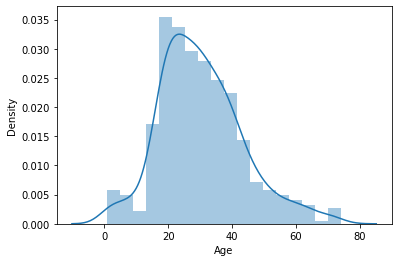

In [481]:
sns.distplot(train['Age'][train['Survived']==0])

C:\Users\saurabh nale\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saurabh nale\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Age', ylabel='Density'>

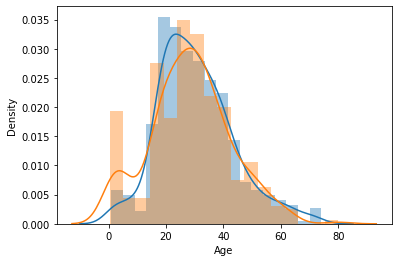

In [482]:
sns.distplot(train['Age'][train['Survived']==0])
sns.distplot(train['Age'][train['Survived']==1])

C:\Users\saurabh nale\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\saurabh nale\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot: xlabel='Fare', ylabel='Density'>

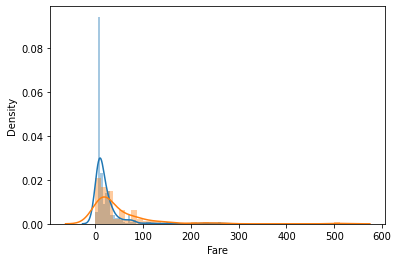

In [483]:
sns.distplot(train['Fare'][train['Survived']==0])
sns.distplot(train['Fare'][train['Survived']==1])

In [484]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

till now we are keeping Survived, Pclass,  Sex ,Age and removing Ticket           

In [485]:
train.drop(columns=['Ticket'], inplace=True)
test.drop(columns=['Ticket'], inplace=True)

In [486]:
train['family'] = train['SibSp'] + train['Parch'] + 1

In [487]:
test['family'] = test['SibSp'] + test['Parch'] + 1

In [488]:
train['family'].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: family, dtype: int64

In [489]:
train.groupby(['family'])['Survived'].mean()

family
1     0.303538
2     0.552795
3     0.578431
4     0.724138
5     0.200000
6     0.136364
7     0.333333
8     0.000000
11    0.000000
Name: Survived, dtype: float64

In [490]:
def cal(number):
    if number==1:
        return "Alone"
    elif number > 1 and number < 5:
        return "Medium"
    else:
        return "Large"

In [491]:
train['family_size'] = train['family'].apply(cal)

In [492]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,family,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,2,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,2,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,1,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,2,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,1,Alone


In [493]:
test['family_size'] = test['family'].apply(cal)


In [494]:
train.drop(columns=['SibSp', 'Parch','family'] , inplace=True)


In [495]:
test.drop(columns=['SibSp', 'Parch','family'] , inplace=True)

In [496]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,Fare,Embarked,family_size
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,7.2500,S,Medium
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,71.2833,C,Medium
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,7.9250,S,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,53.1000,S,Medium
4,5,0,3,"Allen, Mr. William Henry",male,35.0,8.0500,S,Alone


In [497]:
print(train.shape)
print(test.shape)

(891, 9)
(418, 9)


In [498]:
passengerID = test['PassengerId'].values

In [499]:
train.drop(columns=['PassengerId', 'Name'] , inplace=True)
test.drop(columns=['PassengerId', 'Name'] , inplace=True)

In [500]:
train.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,family_size
0,0,3,male,22.0,7.2500,S,Medium
1,1,1,female,38.0,71.2833,C,Medium
2,1,3,female,26.0,7.9250,S,Alone
3,1,1,female,35.0,53.1000,S,Medium
4,0,3,male,35.0,8.0500,S,Alone


In [501]:
test.head()

,Pclass,Sex,Age,Fare,Embarked,Survived,family_size
0,3,male,34.5,7.8292,Q,0,Alone
1,3,female,47.0,7.0000,S,1,Medium
2,2,male,62.0,9.6875,Q,0,Alone
3,3,male,27.0,8.6625,S,0,Alone
4,3,female,22.0,12.2875,S,1,Medium


<ipython-input-502-6a514a02db94>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = train.iloc[:,:-1].corr(method="pearson")


<AxesSubplot: >

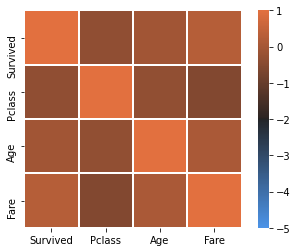

In [502]:
corr = train.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,385,80,60 , center='dark', as_cmap=True)
sns.heatmap(corr , vmax=1, vmin= -5 , cmap= cmap , square = True, linewidths= .2)

In [503]:
train.drop(columns=['Fare'] , inplace=True)

In [504]:
test.drop(columns=['Fare'] , inplace=True)

In [505]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,family_size
0,0,3,male,22.0,S,Medium
1,1,1,female,38.0,C,Medium
2,1,3,female,26.0,S,Alone
3,1,1,female,35.0,S,Medium
4,0,3,male,35.0,S,Alone


In [529]:
test.head()

,Pclass,Survived,Sex_female,Sex_male,Age_adult,Age_child,Age_old,Embarked_C,Embarked_Q,Embarked_S,family_size_Alone,family_size_Large,family_size_Medium
0,3,0,0,1,1,0,0,0,1,0,1,0,0
1,3,1,1,0,0,0,1,0,0,1,0,0,1
2,2,0,0,1,0,0,1,0,1,0,1,0,0
3,3,0,0,1,1,0,0,0,0,1,1,0,0
4,3,1,1,0,1,0,0,0,0,1,0,0,1


<AxesSubplot: >

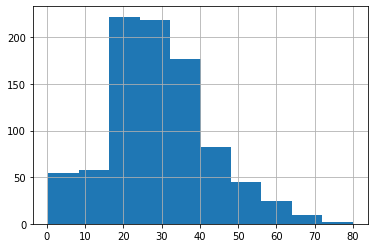

In [506]:
train['Age'].hist()

In [507]:
def agedf(age):
    if age> 0 and age <= 18:
        return "child"
    elif age > 18 and age <= 40:
        return "adult"
    elif age > 40:
        return "old"

In [508]:
train['Age'] = train['Age'].astype(int)

In [509]:
train['Age'] = train['Age'].apply(agedf)

In [510]:
train.head()

,Survived,Pclass,Sex,Age,Embarked,family_size
0,0,3,male,adult,S,Medium
1,1,1,female,adult,C,Medium
2,1,3,female,adult,S,Alone
3,1,1,female,adult,S,Medium
4,0,3,male,adult,S,Alone


<AxesSubplot: >

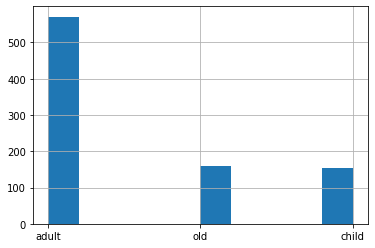

In [511]:
train['Age'].hist()

In [512]:
test['Age'] = test['Age'].apply(agedf)

In [513]:
new_cols = ["Pclass","Sex","Age","Embarked","family_size","Survived"]

train=train.reindex(columns=new_cols)




In [514]:
train.head()

,Pclass,Sex,Age,Embarked,family_size,Survived
0,3,male,adult,S,Medium,0
1,1,female,adult,C,Medium,1
2,3,female,adult,S,Alone,1
3,1,female,adult,S,Medium,1
4,3,male,adult,S,Alone,0


In [530]:
test.head()

,Pclass,Survived,Sex_female,Sex_male,Age_adult,Age_child,Age_old,Embarked_C,Embarked_Q,Embarked_S,family_size_Alone,family_size_Large,family_size_Medium
0,3,0,0,1,1,0,0,0,1,0,1,0,0
1,3,1,1,0,0,0,1,0,0,1,0,0,1
2,2,0,0,1,0,0,1,0,1,0,1,0,0
3,3,0,0,1,1,0,0,0,0,1,1,0,0
4,3,1,1,0,1,0,0,0,0,1,0,0,1


In [515]:
train = pd.get_dummies(train, columns = ['Sex', 'Age','Embarked','family_size'])

In [524]:
test = pd.get_dummies(test, columns = ['Sex', 'Age','Embarked','family_size'])

In [525]:
test.head()

,Pclass,Survived,Sex_female,Sex_male,Age_adult,Age_child,Age_old,Embarked_C,Embarked_Q,Embarked_S,family_size_Alone,family_size_Large,family_size_Medium
0,3,0,0,1,1,0,0,0,1,0,1,0,0
1,3,1,1,0,0,0,1,0,0,1,0,0,1
2,2,0,0,1,0,0,1,0,1,0,1,0,0
3,3,0,0,1,1,0,0,0,0,1,1,0,0
4,3,1,1,0,1,0,0,0,0,1,0,0,1


In [517]:
train.head()

,Pclass,Survived,Sex_female,Sex_male,Age_adult,Age_child,Age_old,Embarked_C,Embarked_Q,Embarked_S,family_size_Alone,family_size_Large,family_size_Medium
0,3,0,0,1,1,0,0,0,0,1,0,0,1
1,1,1,1,0,1,0,0,1,0,0,0,0,1
2,3,1,1,0,1,0,0,0,0,1,1,0,0
3,1,1,1,0,1,0,0,0,0,1,0,0,1
4,3,0,0,1,1,0,0,0,0,1,1,0,0


In [571]:
X_test = test.drop([test.columns[1]], axis = 1)
y_test = test[test.columns[1]]

Neive Bayes From Scrach

In [518]:
X = train.drop([train.columns[1]], axis = 1)
y = train[train.columns[1]]

In [519]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [520]:
class NaiveBayes:
    def fit(self, X, y):
        self.classes = np.unique(y)
        self.num_classes = len(self.classes)
        self.priors = np.zeros(self.num_classes)
        self.means = []
        self.variances = []
        
        for i, c in enumerate(self.classes):
            X_c = X[y == c]
            self.priors[i] = X_c.shape[0] / float(X.shape[0])
            self.means.append(np.mean(X_c, axis=0))
            self.variances.append(np.var(X_c, axis=0))
    
    def predict(self, X):
        predictions = []
        
        for x in X:
            posteriors = []
            
            for i, c in enumerate(self.classes):
                prior = np.log(self.priors[i])
                likelihood = np.sum(np.log(self.calculate_likelihood(x, self.means[i], self.variances[i])))
                posterior = prior + likelihood
                posteriors.append(posterior)
            
            predictions.append(self.classes[np.argmax(posteriors)])
        
        return predictions
    
    def calculate_likelihood(self, x, mean, variance):
        exponent = np.exp(-(x - mean)**2 / (2 * variance))
        likelihood = (1 / np.sqrt(2 * np.pi * variance)) * exponent
        return likelihood


In [521]:
nb = NaiveBayes()
nb.fit(X, y)

In [563]:
X_testing = X_test.values

In [562]:
predictions = nb.predict(X_testing)

In [557]:
def calculate_accuracy(y_true, y_pred):
    correct_predictions = np.sum(y_true == y_pred)
    total_predictions = len(y_true)
    accuracy = correct_predictions / total_predictions
    return accuracy


In [558]:
calculate_accuracy(predictions, y_test)

0.8923444976076556

We have got 89 percent accuracy from the implementation Now lets implement the KNN from Scrach

In [559]:
class KNN:
    def __init__(self, k=3):
        self.k = k
    
    def fit(self, X, y):
        self.X_train = X
        self.y_train = y
    
    def euclidean_distance(self, x1, x2):
        return np.sqrt(np.sum((x1 - x2) ** 2))
    
    def predict(self, X):
        y_pred = []
        
        for x in X:
            distances = [self.euclidean_distance(x, x_train) for x_train in self.X_train]
            sorted_indices = np.argsort(distances)[:self.k]
            k_nearest_labels = [self.y_train[i] for i in sorted_indices]
            most_common = np.argmax(np.bincount(k_nearest_labels))
            y_pred.append(most_common)
        
        return y_pred


In [608]:
X_knn = train.drop([train.columns[1]], axis = 1).values
y_knn = train[train.columns[1]].values

In [597]:
X_knn

array([[3, 0, 1, ..., 0, 0, 1],
       [1, 1, 0, ..., 0, 0, 1],
       [3, 1, 0, ..., 1, 0, 0],
       ...,
       [3, 1, 0, ..., 0, 0, 1],
       [1, 0, 1, ..., 1, 0, 0],
       [3, 0, 1, ..., 1, 0, 0]], dtype=int64)

In [585]:
X_knn.head()

,Pclass,Sex_female,Sex_male,Age_adult,Age_child,Age_old,Embarked_C,Embarked_Q,Embarked_S,family_size_Alone,family_size_Large,family_size_Medium
0,3,0,1,1,0,0,0,0,1,0,0,1
1,1,1,0,1,0,0,1,0,0,0,0,1
2,3,1,0,1,0,0,0,0,1,1,0,0
3,1,1,0,1,0,0,0,0,1,0,0,1
4,3,0,1,1,0,0,0,0,1,1,0,0


In [598]:
knn = KNN(k=5)


knn.fit(X_knn, y_knn)

In [599]:
X_test_knn = test.drop([test.columns[1]], axis = 1)
y_test_knn = test[test.columns[1]]

In [603]:
X_test_knn = X_test_knn.values

In [605]:
y_test_knn = y_test_knn.values

In [604]:
predictions_knn = knn.predict(X_test_knn)

In [606]:
calculate_accuracy(predictions_knn, y_test_knn)

0.8875598086124402

We Got the accuracy of 88 Percent with KNN